In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools as it
from MetricMethod import *
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [5]:
train = pd.read_csv("train_phone.csv")
test = pd.read_csv("test_phote.csv")
df = pd.concat([train, test])
df = df.drop(columns='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_scr

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [18]:
len(df.columns)

21

array([[<AxesSubplot: title={'center': 'battery_power'}>,
        <AxesSubplot: title={'center': 'blue'}>,
        <AxesSubplot: title={'center': 'clock_speed'}>],
       [<AxesSubplot: title={'center': 'dual_sim'}>,
        <AxesSubplot: title={'center': 'fc'}>,
        <AxesSubplot: title={'center': 'four_g'}>],
       [<AxesSubplot: title={'center': 'int_memory'}>,
        <AxesSubplot: title={'center': 'm_dep'}>,
        <AxesSubplot: title={'center': 'mobile_wt'}>]], dtype=object)

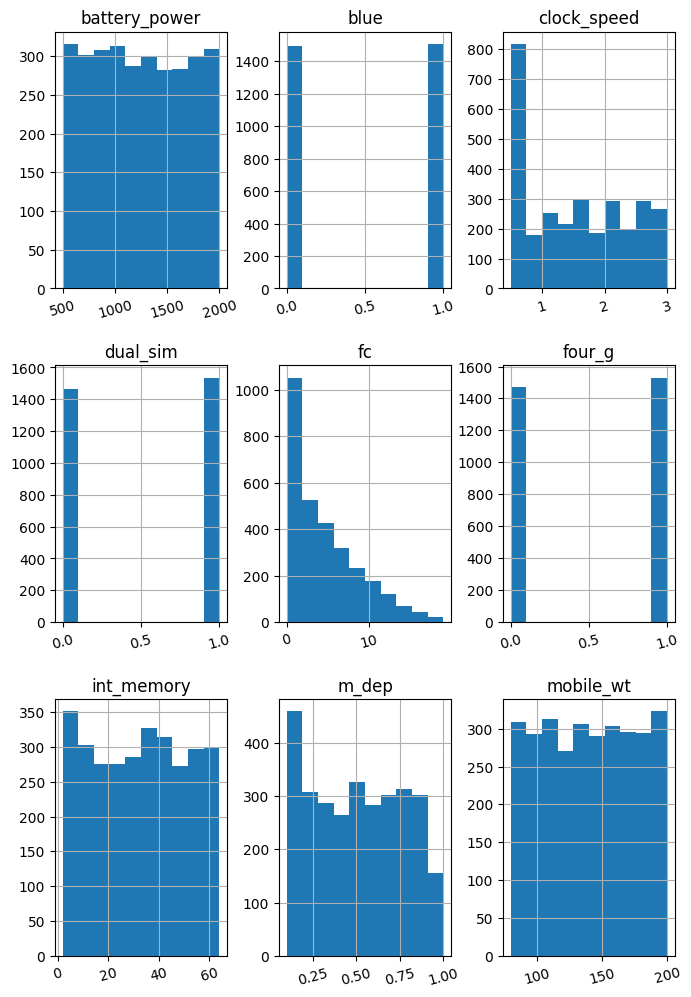

In [21]:
t = df.iloc[:, 0:9]
t.hist(figsize=(8, 12), xrot=15)

array([[<AxesSubplot: title={'center': 'n_cores'}>,
        <AxesSubplot: title={'center': 'pc'}>,
        <AxesSubplot: title={'center': 'px_height'}>],
       [<AxesSubplot: title={'center': 'px_width'}>,
        <AxesSubplot: title={'center': 'ram'}>,
        <AxesSubplot: title={'center': 'sc_h'}>],
       [<AxesSubplot: title={'center': 'sc_w'}>,
        <AxesSubplot: title={'center': 'talk_time'}>,
        <AxesSubplot: title={'center': 'three_g'}>],
       [<AxesSubplot: title={'center': 'touch_screen'}>,
        <AxesSubplot: title={'center': 'wifi'}>,
        <AxesSubplot: title={'center': 'price_range'}>]], dtype=object)

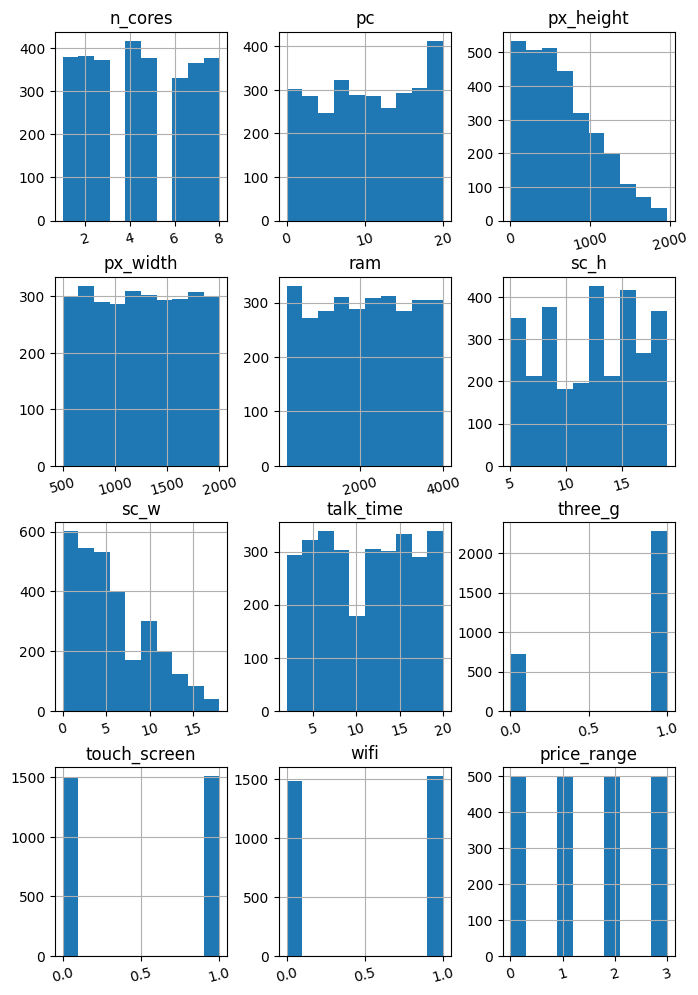

In [22]:
t = df.iloc[:, 9:]
t.hist(figsize=(8, 12), xrot=15)

In [35]:
def draw_box_plot(df: pd.DataFrame):
    t = df
    # Получение количества колонок
    num_columns = len(t.columns)

    # Расчет количества строк и столбцов для сетки
    num_rows = int((num_columns + 1) / 2)  # Округляем вверх до ближайшего целого числа

    # Создание сетки подграфиков
    fig, axes = plt.subplots(num_rows, 2, figsize=(8, 12))

    # Распаковка двумерного массива осей в одномерный массив
    axes = axes.flatten()

    # Построение ящиковых диаграмм для каждой колонки
    for i, column in enumerate(t.columns):
        # Построение ящиковой диаграммы для текущей колонки
        axes[i].boxplot(t[column].astype(float))
        axes[i].grid(True)
        
        # Установка заголовка для текущего графика
        axes[i].set_title(column)

    # Удаление пустых подграфиков
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])

    # Расположение подграфиков
    fig.tight_layout()

    # Отображение графиков
    plt.show()

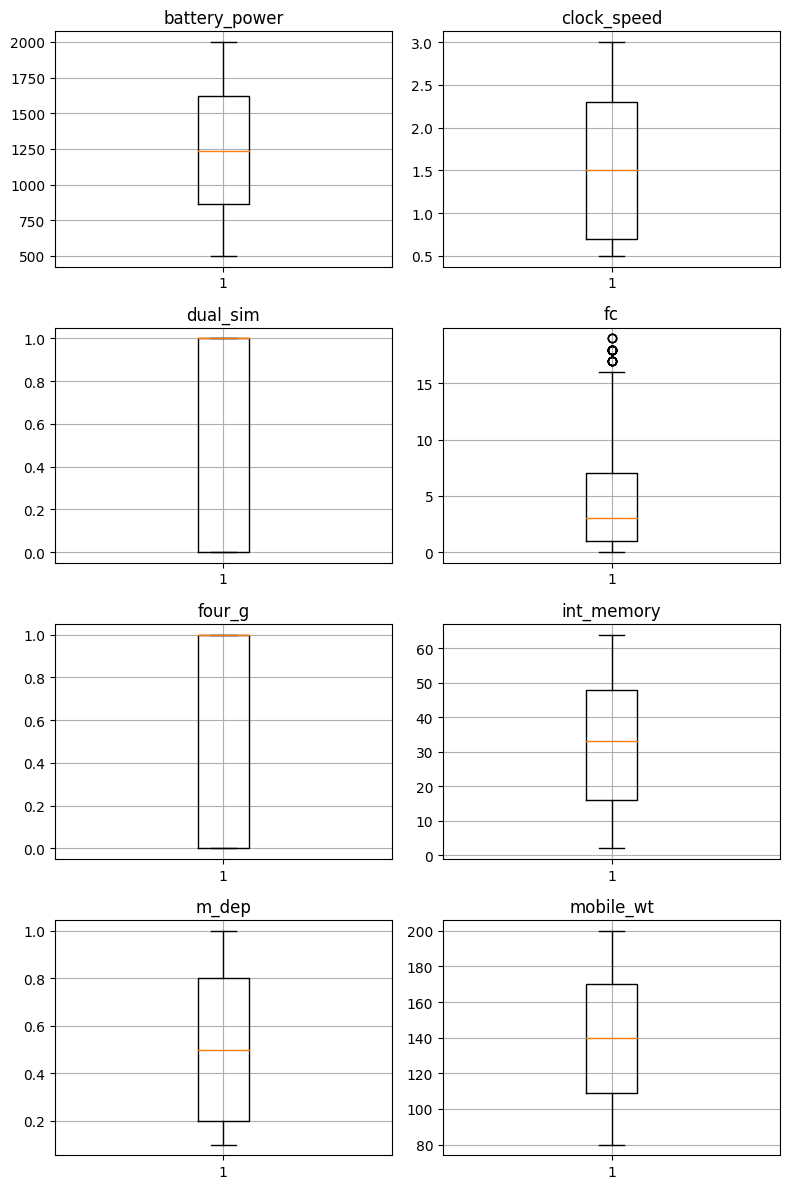

In [47]:
t = df.drop(columns=['three_g', 'wifi', 'touch_screen', 'price_range', 'blue'])
draw_box_plot(t.iloc[:, 0:8])

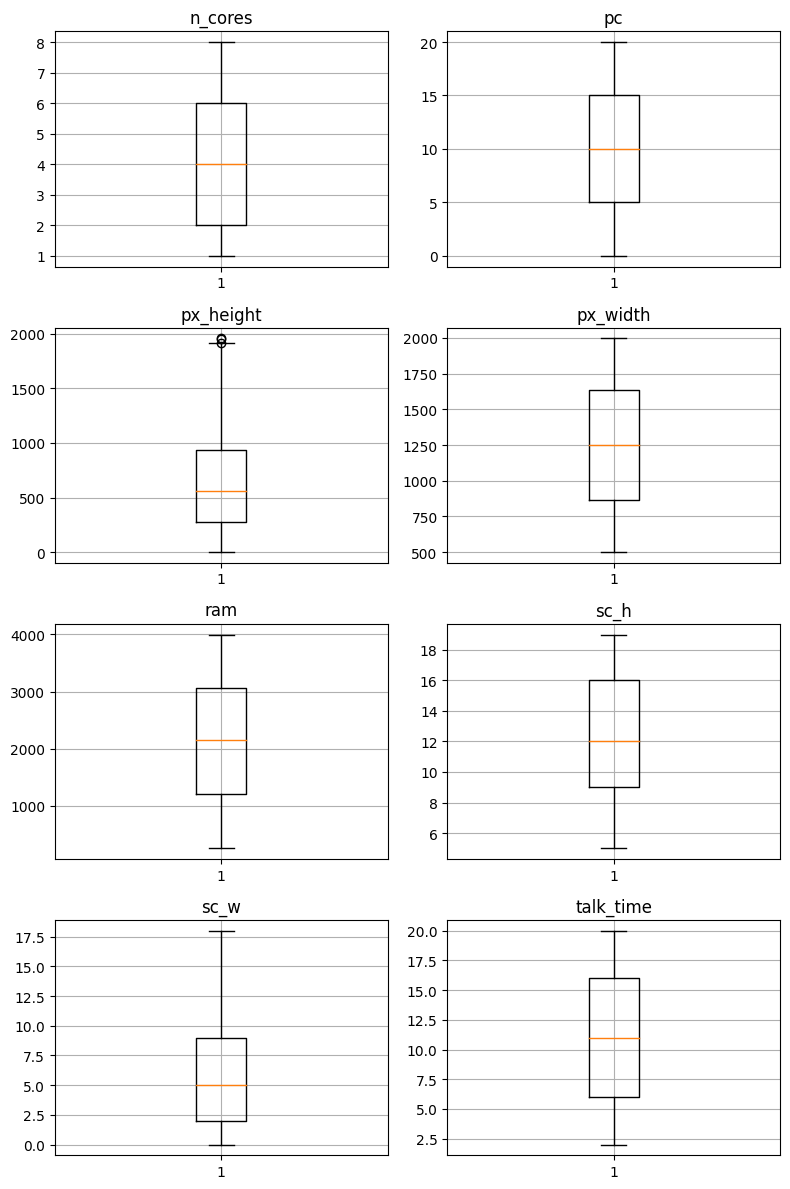

In [48]:
draw_box_plot(t.iloc[:, 8:])